# Credit Card Clustering

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.cluster import KMeans

You can download the dataset [here](https://statso.io/customer-segmentation-case-study/) .

In [2]:
data = pd.read_csv("data/CC GENERAL.csv")

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Before moving forward, let’s check whether this dataset contains any null values or not:

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The dataset has some null values in the minimum payments column. I will drop the rows with null values and move further:

In [5]:
data = data.dropna()

There are three features in the dataset which are very valuable for the task of credit card segmentation:

1. BALANCE: The balance left in the accounts of credit card customers.
2. PURCHASES: Amount of purchases made from the accounts of credit card customers.
3. CREDIT_LIMIT: The limit of the credit card.

These three features are enough to group credit card holders as they tell us about the buying history, bank balance, and credit limit of the credit card holders. So let’s use these features to create clusters from the dataset:

In [6]:
clustering_data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # Explicit n_init to avoid warnings
clusters = kmeans.fit_predict(scaled_data)

data = data.copy()

data["CREDIT_CARD_SEGMENTS"] = clusters

I have added a new column as “CREDIT_CARD_SEGMENTS”. It contains labels about the group of credit card customers. The groups formed range from 0 to 4. For simplicity, I will transform the names of these clusters:

In [7]:
# Map cluster numbers to labels safely
cluster_map = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"}
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map(cluster_map)

# Print first 10 rows of the CREDIT_CARD_SEGMENTS column
print(data["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 2
1     Cluster 3
2     Cluster 3
4     Cluster 2
5     Cluster 2
6     Cluster 5
7     Cluster 2
8     Cluster 1
9     Cluster 5
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


Now let’s visualize the credit card clusters we found from our cluster analysis:

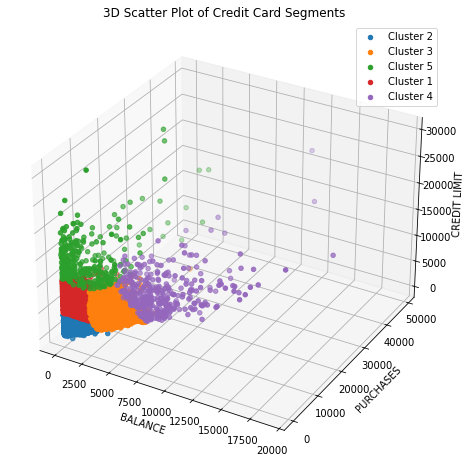

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through unique credit card segments
for segment in data["CREDIT_CARD_SEGMENTS"].unique():
    subset = data[data["CREDIT_CARD_SEGMENTS"] == segment]
    ax.scatter(subset["BALANCE"], subset["PURCHASES"], subset["CREDIT_LIMIT"], label=str(segment))

# Labels and title
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
ax.set_zlabel("CREDIT LIMIT")
ax.set_title("3D Scatter Plot of Credit Card Segments")

# Show legend
ax.legend()

plt.show()
